In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

C:\Users\xxkem\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('weight-height.csv')
data.shape

(10000, 3)

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


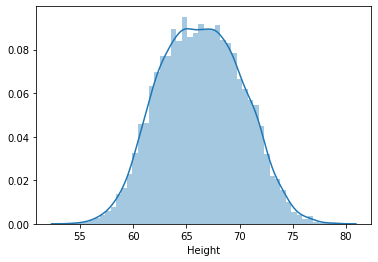

In [5]:
sns.distplot(data.Height)

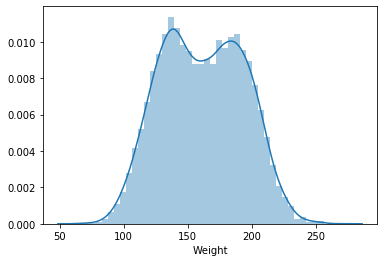

In [6]:
sns.distplot(data.Weight)

In [7]:
data.Height.quantile([0.05, 0.95])

0.05    60.246221
0.95    72.617106
Name: Height, dtype: float64

In [8]:
data[(data.Height < data.Height.quantile(0.05)) | (data.Height > data.Height.quantile(0.95))]

,Gender,Height,Weight
0,Male,73.847017,241.893563
2,Male,74.110105,212.740856
23,Male,75.205974,228.761781
27,Male,72.800844,206.828189
31,Male,74.033808,212.910225
...,...,...,...
9978,Female,57.375759,114.192209
9984,Female,59.047029,111.707369
9988,Female,59.538729,121.244876
9993,Female,60.030434,97.687432


In [9]:
data1 = data[(data.Height > data.Height.quantile(0.05)) & (data.Height < data.Height.quantile(0.95))]
data1.shape

(9000, 3)

In [10]:
df1 = pd.read_csv('Housing_price.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [27]:
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [28]:
df1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


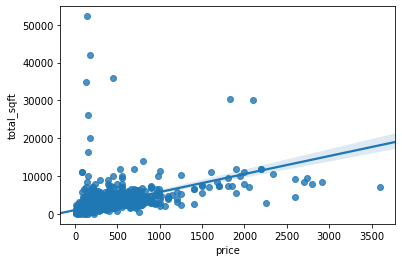

In [31]:
sns.regplot(data = df1, x = 'price', y = 'total_sqft')

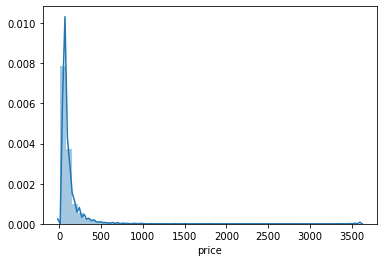

In [40]:
sns.distplot(df1.price)

In [48]:
max_threshold, min_threshold = df1.price.quantile(0.05),df1.price.quantile(0.99)
max_threshold, min_threshold

(31.99, 660.0)

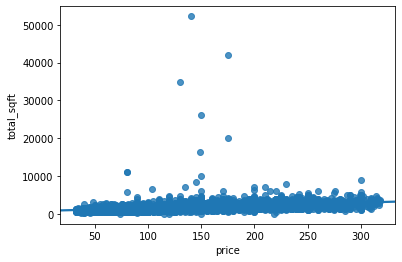

In [39]:
df2 = df1[(df1.price > df1.price.quantile(0.05)) & (df1.price < df1.price.quantile(0.95))]
sns.regplot(data = df2, x = 'price', y = 'total_sqft')

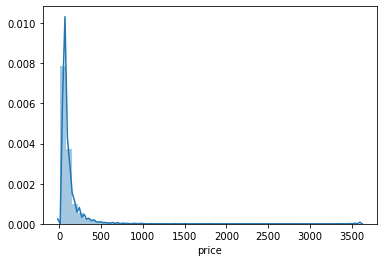

In [50]:
sns.distplot(df1.price)

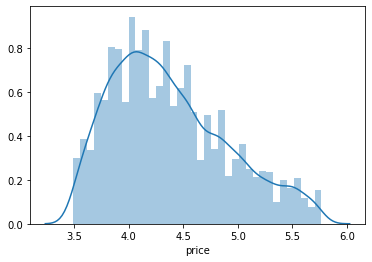

In [46]:
sns.distplot(np.log1p(df2.price))

Exercise

In [12]:
df1 = pd.read_csv('AB_NYC_2019.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [16]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
min_limit, max_limit = df1.price.quantile([0.05,0.99])
min_limit, max_limit

(40.0, 799.0)

In [20]:
df2 = df1[(df1.price > df1.price.quantile(0.05)) & (df1.price < df1.price.quantile(0.99))]
df1.shape, df2.shape

((48895, 16), (45590, 16))

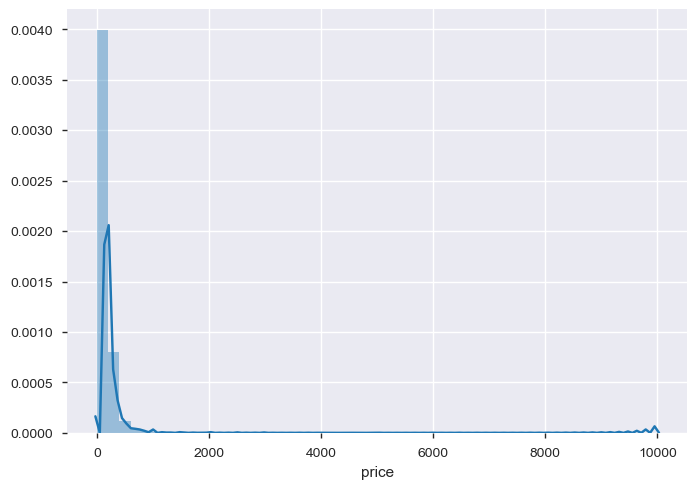

In [21]:
sns.distplot(df1.price)